# Classification Problem

## Using pipeline Build machine Learning Model

# Import all Library

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import os
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle

In [105]:
# Set Display of Monitor
pd.set_option('Display.max_rows',500)
pd.set_option('Display.max_columns',500)
pd.set_option('Display.width',1000)

# Data Exploring and Understanding

In [2]:
os.getcwd()

'C:\\Users\\DELL'

In [3]:
os.chdir('C:\\Users\\DELL\\OneDrive\\Desktop\\Download')

In [4]:
# Data Read 
data_a = pd.read_csv('Titanic dataset.csv')

In [5]:
data = data_a.copy()

In [6]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
# Check Dataset Dimention
print('Total Rows of dataset:-',data.shape[0])
print('Total Columns of dataset:-',data.shape[1])

Total Rows of dataset:- 891
Total Columns of dataset:- 12


In [8]:
# All numerical columns
data.columns[data.dtypes != object]

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
# All categorical columns
data.columns[data.dtypes == object]

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [10]:
# All Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Check class event rate --> check 0 class and 1 class ka proportion
# Here nope class inbailest
data['Survived'].value_counts() / data.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Exploratory Data Analysis

In [12]:
# All statistical summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
# Univariate Analysis --> Explore one column at a one time
# 0 --> No
# 1 --> yes
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
data['Survived'].replace({0:'No',1:'yes'},inplace=True)

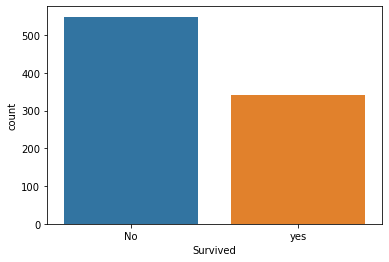

In [15]:
sns.countplot(data['Survived'])
plt.show()

In [16]:
data['Survived'].replace({'No':0,'yes':1},inplace=True)

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

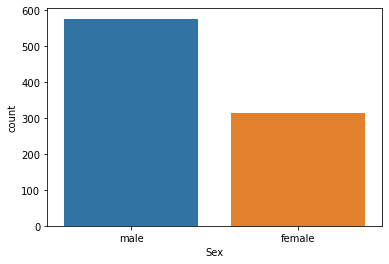

In [18]:
sns.countplot(data['Sex'])
plt.show()

In [19]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

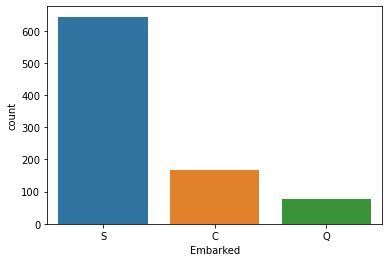

In [20]:
sns.countplot(data['Embarked'])
plt.show()

In [21]:
# Bivariate Analysis --> Continuous Vs Continuous
data.corr().T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


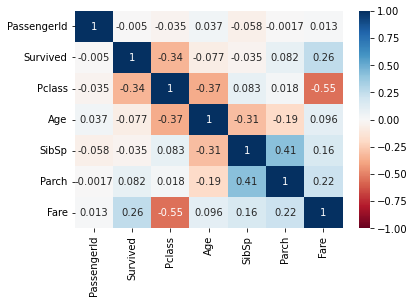

In [22]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

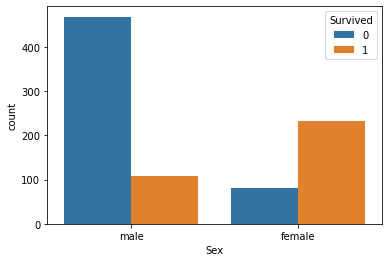

In [23]:
# Bivariate Analysis --> Categorical Vs Categorical
sns.countplot(data['Sex'],hue=data['Survived'])
plt.show()

In [24]:
data_sur = data.groupby(by=['Sex','Survived'])['Survived'].count()

In [25]:
data_sur

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [26]:
print('Female Survived percentage:-%.2f%%'%(data_sur['female'][1]/(data_sur['female'][1]+data_sur['female'][0])*100))
print('Male Survived percentage:-%.2f%%'%(data_sur['male'][1]/(data_sur['male'][1]+data_sur['male'][0])*100))

Female Survived percentage:-74.20%
Male Survived percentage:-18.89%


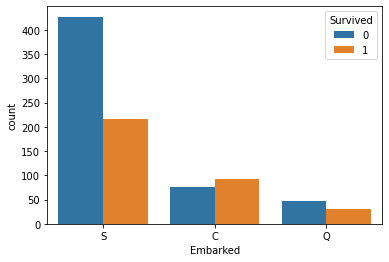

In [27]:
sns.countplot(data['Embarked'],hue=data['Survived'])
plt.show()

In [28]:
em_data = data.groupby(by=['Embarked','Survived'])['Survived'].count()
em_data

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [29]:
print('percentage of S:- %.2f%%'%(em_data['S'][1]/(em_data['S'][0]+em_data[0])*100))
print('percentage of Q:- %.2f%%'%(em_data['Q'][1]/(em_data[1]+em_data[0])*100))
print('pecentage of C:- %.2f%%'%(em_data['C'][1]/(em_data[1]+em_data[0])*100))

percentage of S:- 43.23%
percentage of Q:- 17.86%
pecentage of C:- 55.36%


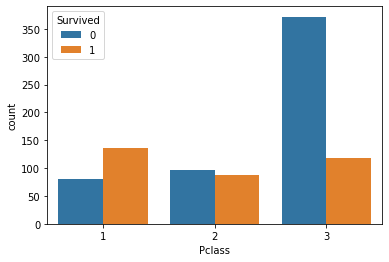

In [30]:
sns.countplot(data['Pclass'],hue=data['Survived'])
plt.show()

In [31]:
p_s = data.groupby(by=['Pclass','Survived'])['Survived'].count()

In [32]:
p_s

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [33]:
print('1st class survived percentage:- %.2f%%'%(p_s[1][1]/(p_s[1][1]+p_s[1][0])*100))
print('2nd class survived percentage:- %.2f%%'%(p_s[2][1]/(p_s[2][1]+p_s[2][0])*100))
print('3rd class survived percentage:- %.2f%%'%(p_s[3][1]/(p_s[3][1]+p_s[3][0])*100))

1st class survived percentage:- 62.96%
2nd class survived percentage:- 47.28%
3rd class survived percentage:- 24.24%


In [34]:
# Add new column
def age_category(age):
    if age <= 12:
        return 'children'
    elif age > 12 and age <=18:
        return 'Teenage'
    elif age > 18 and age <= 30:
        return 'Youth'
    elif age > 30 and age <=45:
        return 'Midage'
    elif age > 45 and age <=60:
        return 'Seniors'
    else:
        return 'Oldages'

In [35]:
data['Age_category'] = data['Age'].apply(age_category)

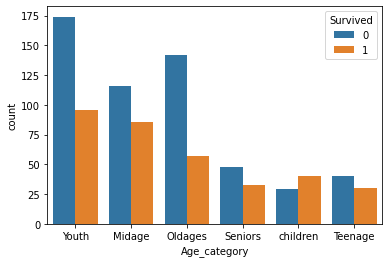

In [36]:
sns.countplot(data['Age_category'],hue=data['Survived'])
plt.show()

In [37]:
data['Age_category'].value_counts()

Youth       270
Midage      202
Oldages     199
Seniors      81
Teenage      70
children     69
Name: Age_category, dtype: int64

In [38]:
Age_sur = data.groupby(by=['Age_category','Survived'])['Survived'].count()

In [39]:
Age_sur

Age_category  Survived
Midage        0           116
              1            86
Oldages       0           142
              1            57
Seniors       0            48
              1            33
Teenage       0            40
              1            30
Youth         0           174
              1            96
children      0            29
              1            40
Name: Survived, dtype: int64

In [40]:
print('MidAge survived percentage:-%.2f%%'%(Age_sur['Midage'][1]/(Age_sur['Midage'][1]+Age_sur['Midage'][0])*100))
print('Oldages survived percentage:-%.2f%%'%(Age_sur['Oldages'][1]/(Age_sur['Oldages'][1]+Age_sur['Oldages'][0])*100))
print('Seniors survived percentage:-%.2f%%'%(Age_sur['Seniors'][1]/(Age_sur['Seniors'][1]+Age_sur['Seniors'][0])*100))
print('Youth survived percentage:-%.2f%%'%(Age_sur['Youth'][1]/(Age_sur['Youth'][1]+Age_sur['Youth'][0])*100))
print('children survived percentage:-%.2f%%'%(Age_sur['children'][1]/(Age_sur['children'][1]+Age_sur['children'][0])*100))
print('TeenAge survived percentage :-%.2f%%'%(Age_sur['Teenage'][1]/(Age_sur['Teenage'][1]+Age_sur['Teenage'][0])*100))

MidAge survived percentage:-42.57%
Oldages survived percentage:-28.64%
Seniors survived percentage:-40.74%
Youth survived percentage:-35.56%
children survived percentage:-57.97%
TeenAge survived percentage :-42.86%


In [41]:
pd.crosstab(data['Age_category'],data['Survived'])

Survived,0,1
Age_category,,
Midage,116,86
Oldages,142,57
Seniors,48,33
Teenage,40,30
Youth,174,96
children,29,40


# Perform some statistical test

In [42]:
obvserved = pd.crosstab(data['Age_category'],data['Survived'])

In [43]:
# H0 --> null hypothesis --> The survived not depend on Age_category
# H1 --> Alternate hypothesis --> The survived is Depends upon the Agecategory
chi,p,dof,expected = chi2_contingency(obvserved)
print('chi_square:-',chi)
print('p_value:-',p)
if p<0.05:
    print('Accept the H1')
else:
    print('Accept the H0')

chi_square:- 22.371876386576556
p_value:- 0.00044486673473075885
Accept the H1


Data Analysis conclusion:--

1) The Survival Rate of Female passengers is higher as compared to male passengers (females were given priority while rescue)

2) The Survival Rate of passengers from 1st class was highest. (The passengers from 1st and 2nd clsss were given priority while
rescue)

3) Children, Teenagers, and Senior citizens were given priority while rescue.

4) Although the Survival Rate for passengers boarded from chebourge was the highest while here more number of passengers from
southampton we cannot say that was any priority on the basis of boarding station.


# Data Preprocessing

# Feature Engineening

In [44]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage


In [45]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [46]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

# Handle mixed varable ya mixed dataset

In [47]:
# Handle mixed variable Cabin feature 
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # Capture numerical parts
data['Cabin_cat'] = data['Cabin'].str[0]
data['Cabin_num'] = pd.to_numeric(data['Cabin_num'],errors='coerce',downcast='integer')

In [48]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

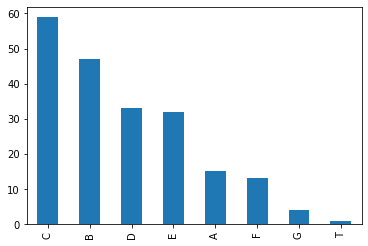

In [49]:
data['Cabin_cat'].value_counts().plot(kind='bar')
plt.show()

In [50]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage,85.0,C


In [51]:
# Handle mixed variable ticket feature
data['ticket_num'] = data['Ticket'].apply(lambda s: s.split()[-1])
data['ticket_num'] = pd.to_numeric(data['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
data['ticket_cat'] = data['Ticket'].apply(lambda s: s.split()[0])
data['ticket_cat'] = np.where(data['ticket_cat'].str.isdigit(), np.nan,
                              data['ticket_cat'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_category  891 non-null    object 
 13  Cabin_num     200 non-null    float64
 14  Cabin_cat     204 non-null    object 
 15  ticket_num    887 non-null    float64
 16  ticket_cat    230 non-null    object 
dtypes: float64(4), int64(5), object(8)
memory usage: 118.5+ KB


In [53]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Cabin_num,Cabin_cat,ticket_num,ticket_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Youth,NaN,NaN,21171.0,A/5


# Feature Splitting

In [54]:
# Handle otmic value 
# Otmic value like --> Mr,Mrs,Miss
data[["Name"]].head(1)

,Name
0,"Braund, Mr. Owen Harris"


In [55]:
data['Name'].str.split(', ',expand=True)[1].head(1)

0    Mr. Owen Harris
Name: 1, dtype: object

In [56]:
data['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True).head(1)

,0,1,2
0,Mr,Owen Harris,None


In [57]:
# Finally Extract otmic value 
data['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [58]:
data['Title'] = data['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]

In [59]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Cabin_num,Cabin_cat,ticket_num,ticket_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Youth,NaN,NaN,21171.0,A/5,Mr


In [60]:
data.groupby(by=['Title']).mean()['Survived'].sort_values(ascending=False)

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

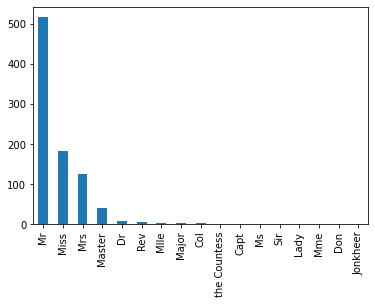

In [61]:
data['Title'].value_counts().plot(kind='bar')
plt.show()

In [62]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Cabin_num,Cabin_cat,ticket_num,ticket_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,NaN,NaN,21171.0,A/5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage,85.0,C,17599.0,PC,Mrs


# Feature Contruction

In [63]:
data['Family_size'] = data['Parch'] + data['SibSp'] + 1

In [64]:
data[['Family_size']].head(2)

,Family_size
0,2
1,2


In [65]:
def myfun(num):
    if num == 1:
        # alone
        return 0
    elif num>1 and num<4:
        # small family
        return 1
    else:
        # large family
        return 2
    

In [66]:
data['Family_type'] = data['Family_size'].apply(myfun)

 # Feature Selection

In [67]:
# Drop all Unnecessary columns
data.drop(columns=['Ticket','Name','PassengerId','Cabin','Age_category','SibSp','Parch','Family_size'],inplace=True)

In [68]:
data.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_num,Cabin_cat,ticket_num,ticket_cat,Title,Family_type
0,0,3,male,22.0,7.25,S,NaN,NaN,21171.0,A/5,Mr,1


# Check Multicollinearty 

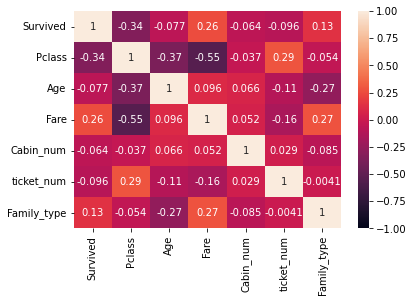

In [69]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True)
plt.show()

In [70]:
data.drop(columns=['Fare'],inplace=True)

# Capping outliers 

In [71]:
new_dt = data.columns[data.dtypes != object]

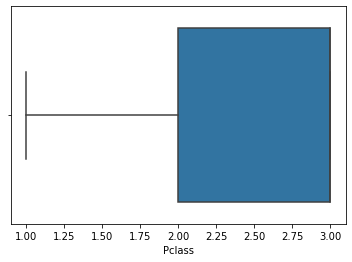

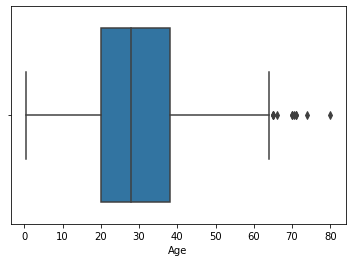

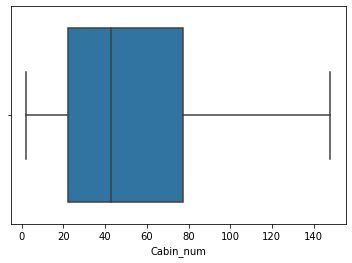

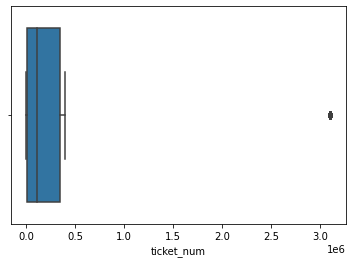

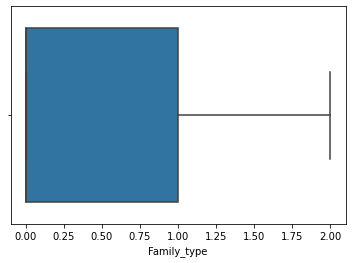

In [72]:
for i in new_dt:
    if i!='Survived':
        figure()
        sns.boxplot(data[i])

In [73]:
out_d = data[['Age','ticket_num']]

In [74]:
for i in out_d:
    Q1 = np.percentile(data[i],25)
    Q3 = np.percentile(data[i],75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    data[i] = np.where(data[i]>upper_bound,upper_bound,data[i])
    data[i] = np.where(data[i]<lower_bound,lower_bound,data[i])

In [75]:
# Check missing Values
data.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
Cabin_num      691
Cabin_cat      687
ticket_num       4
ticket_cat     661
Title            0
Family_type      0
dtype: int64

In [76]:
# Pecentage of missing values
(data.isnull().mean() * 100).sort_values(ascending=False)

Cabin_num      77.553311
Cabin_cat      77.104377
ticket_cat     74.186308
Age            19.865320
ticket_num      0.448934
Embarked        0.224467
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Title           0.000000
Family_type     0.000000
dtype: float64

# Mssing values Impputation

In [77]:
for i in data.columns:
    if data[i].dtypes !='O':
        median = data[i].median()
        data[i].fillna(median,inplace=True)
    else:
        mode = data[i].mode()[0]
        data[i].fillna(mode,inplace=True)
    

In [78]:
data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Cabin_num      0
Cabin_cat      0
ticket_num     0
ticket_cat     0
Title          0
Family_type    0
dtype: int64

In [79]:
# Dummies Variable Creation
data_1 = pd.get_dummies(data,drop_first=True)

# Data seprate into two parts

In [80]:
X = data_1.drop(columns=['Survived'],axis=1)
y = data_1['Survived']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=123)

In [82]:
X_train.shape

(712, 73)

# PCA Apply 

In [83]:
# Data Standarization 
Train_Scaling = StandardScaler().fit(X_train)  
Train_Standardized = Train_Scaling.transform(X_train) 
Test_Standardized  = Train_Scaling.transform(X_test)

# Add the column names to Train_X_Std, Test_X_Std
Train_Standardized = pd.DataFrame(Train_Standardized, columns = X_train.columns)
Test_Standardized = pd.DataFrame(Test_Standardized, columns = X_test.columns)

In [84]:
Train_Standardized.head(2)

,Pclass,Age,Cabin_num,ticket_num,Family_type,Sex_male,Embarked_Q,Embarked_S,Cabin_cat_B,Cabin_cat_C,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,-1.599696,-1.054762,-1.559229,-0.288407,0.781384,-1.355232,-0.322298,-1.628276,4.536051,-2.326889,...,-0.209734,1.927494,-0.037503,-0.037503,-1.195840,-0.392391,-0.037503,-0.075165,0.0,-0.037503
1,0.815964,0.121385,-0.091681,0.053653,-0.734543,0.737881,3.102719,-1.628276,-0.220456,0.429758,...,-0.209734,-0.518808,-0.037503,-0.037503,0.836232,-0.392391,-0.037503,-0.075165,0.0,-0.037503


In [85]:
# PCA Model Build 
PCA_Model = PCA(n_components=0.16).fit(Train_Standardized)
PCA_Model

PCA(n_components=0.16)

In [86]:
# Coefficient understanding
len(PCA_Model.components_) # Total PCs found to explain 90% of data

5

In [87]:
PCA_Model.components_ # Coefficients of linear equation (Eigenvectors)

array([[-2.43458049e-01, -2.80950494e-02, -1.28508231e-02,
        -1.65427438e-01,  2.27378140e-01, -4.54285791e-01,
         5.08956203e-02, -1.49319197e-01,  1.89015313e-01,
        -2.70918308e-01,  1.40589936e-01,  8.76982544e-02,
         6.55229389e-02,  7.77875102e-02, -2.69375470e-03,
        -4.43555995e-02, -5.04358828e-02, -5.31940975e-02,
        -7.97935148e-02, -4.80231768e-02, -3.07400348e-02,
        -3.09544088e-02, -4.98470818e-02, -2.74673015e-02,
        -2.60480738e-02,  1.24427465e-02,  8.36774346e-03,
         0.00000000e+00,  2.60699560e-02, -3.18285591e-02,
        -6.29444248e-02,  9.24899164e-03,  1.78523397e-01,
         3.80190889e-02, -3.08260888e-02, -1.48817677e-02,
        -1.21421744e-02, -5.03632554e-02, -1.42439923e-02,
        -3.04176341e-02, -2.71380231e-02,  2.31726427e-02,
         2.79067941e-02, -1.35630233e-02,  3.19140958e-02,
         0.00000000e+00,  1.76279279e-02, -5.96680372e-02,
        -6.18539170e-02, -7.25198838e-02, -1.51684010e-0

In [88]:
# Eigenvector convert into DataFrame 
PCs_Df = pd.DataFrame(PCA_Model.components_).T
PCs_Df.head(2)

,0,1,2,3,4
0,-0.243458,-0.402033,-0.098754,-0.011797,0.120854
1,-0.028095,0.370672,0.016106,0.243914,-0.136896


# Check which original variable has a high impact on PC1

The larger the absolute value/ magnitude of the coefficient, the more variation the corresponding variable has in the original dataset.

In [89]:
# Easier to sort the magnitudes of EIGENVECTORS (COEFFICIENTS) associated with each ORIGINAL VARIABLE
PCs_Df.index = X_train.columns
PCs_Df

,0,1,2,3,4
Pclass,-0.243458,-0.402033,-0.098754,-0.011797,0.120854
Age,-0.028095,0.370672,0.016106,0.243914,-0.136896
Cabin_num,-0.012851,0.073537,-0.154235,0.100345,-0.374557
ticket_num,-0.165427,-0.200385,0.108753,0.460571,0.113293
Family_type,0.227378,-0.205121,0.187672,-0.213470,-0.190960
...,...,...,...,...,...
Title_Mrs,0.247381,-0.033156,0.137810,0.119375,-0.260510
Title_Ms,0.011133,-0.005725,-0.010284,0.020567,-0.016244
Title_Rev,-0.012190,0.029286,-0.037177,0.052967,-0.091633
Title_Sir,0.000000,-0.000000,0.000000,0.000000,0.000000


In [90]:
PCs_Df[0].abs().sort_values(ascending = False)

Title_Mr            0.455367
Sex_male            0.454286
Title_Miss          0.310020
Cabin_cat_C         0.270918
Title_Mrs           0.247381
                      ...   
Title_Major         0.000774
Title_Jonkheer      0.000000
ticket_cat_F.C.     0.000000
ticket_cat_SCO/W    0.000000
Title_Sir           0.000000
Name: 0, Length: 73, dtype: float64

In [91]:
# Sort based on first PC absolute values
PCs_Df.reindex(PCs_Df[0].abs().sort_values(ascending = False).index).head(3)

,0,1,2,3,4
Title_Mr,-0.455367,0.260739,-0.024163,-0.068031,0.115339
Sex_male,-0.454286,0.218179,-0.000696,-0.237977,0.076178
Title_Miss,0.310020,-0.241156,-0.110712,0.170469,0.128725


In [92]:
# Varition explained (Eigenvalues)
print(PCA_Model.explained_variance_ratio_) # % Variation explained by individual PCs (Eigenvalues)
# print(len(PCA_Model.explained_variance_ratio_)) # How many PCs are needed to capture 60% variation
print(sum(PCA_Model.explained_variance_ratio_)) #

[0.0476612  0.03815586 0.03035496 0.02566724 0.02448831]
0.16632757632871453


In [93]:
# Original Data
print(Train_Standardized.shape)
print(Test_Standardized.shape)

(712, 73)
(179, 73)


In [94]:
Train_Transformed = pd.DataFrame(PCA_Model.transform(Train_Standardized))
Test_Transformed = pd.DataFrame(PCA_Model.transform(Test_Standardized))

In [95]:
Train_Transformed.head(2)

,0,1,2,3,4
0,4.132263,0.999196,0.240734,0.151819,1.461886
1,-1.015201,-0.055316,-2.734167,-0.216229,1.246734


In [96]:
# Transformed Data
print(Train_Transformed.shape)
print(Test_Transformed.shape)

(712, 5)
(179, 5)


In [97]:
Train_Transformed.head(3)

,0,1,2,3,4
0,4.132263,0.999196,0.240734,0.151819,1.461886
1,-1.015201,-0.055316,-2.734167,-0.216229,1.246734
2,-1.137376,0.892601,-1.359955,-0.170374,0.367897


In [98]:
# Lets validate whether the correlation between each "new" variable is zero or not 
Train_Transformed.corr().head(3)

,0,1,2,3,4
0,1.000000e+00,3.900015e-16,1.021909e-17,-8.136189e-17,7.731424e-16
1,3.900015e-16,1.000000e+00,1.226458e-16,-3.012876e-16,3.489499e-16
2,1.021909e-17,1.226458e-16,1.000000e+00,1.977881e-16,-2.244582e-16


# Logistic Regression Model Build

In [219]:
def Model_prec_evaluate(*niraj):
    Lr = LogisticRegression()
    Lr.fit(Train_Transformed,y_train)
    y_pred = Lr.predict(Test_Transformed)
    print('Accuracy of the Logistic Regression:-',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    con = confusion_matrix(y_test,y_pred)
    print('confusion Matrix:-')
    print(con)
    print('Cross_val_score Accuracy of Logistic Regression %.2f%%:-'%np.mean(cross_val_score(LogisticRegression(),Train_Transformed,y_train,scoring='accuracy',cv=10)))

In [220]:
Model_prec_evaluate(Train_Transformed,y_train,Test_Transformed,y_test)

Accuracy of the Logistic Regression:- 0.7932960893854749
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       114
           1       0.69      0.78      0.73        65

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179

confusion Matrix:-
[[91 23]
 [14 51]]
Cross_val_score Accuracy of Logistic Regression 0.78%:-


## Hyparameter Tunning LogisticRegression

In [295]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Train_Transformed,y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.787891 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.782257 (0.032534) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.782257 (0.032534) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.782257 (0.032534) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.782257 (0.032534) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.782257 (0.032534) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.783646 (0.033772) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.783646 (0.033772) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.783646 (0.033772) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.783646 (0.033772) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.786463 (0.034654) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.786463 (0.034654) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.783646 (0.033772) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.787891 (0.031942) wi

# Ramdom Forest Model 

In [215]:
def Model_prec_evaluate(*niraj):
    Rm = RandomForestClassifier()
    Rm.fit(Train_Transformed,y_train)
    y_pred_1 = Rm.predict(Test_Transformed)
    print('Accuracy of the Random forest model:-',accuracy_score(y_test,y_pred_1))
    print(classification_report(y_test,y_pred_1))
    con = confusion_matrix(y_test,y_pred_1)
    print('confusion Matrix:-')
    print(con)
    print('Cross_val_score Accuracy of Random Forest %.2f%%:-'%np.mean(cross_val_score(RandomForestClassifier(),Train_Transformed,y_train,scoring='accuracy',cv=10)))

In [216]:
Model_prec_evaluate(Train_Transformed,y_train,Test_Transformed,y_test)

Accuracy of the Random forest model:- 0.8044692737430168
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       114
           1       0.70      0.80      0.75        65

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.80      0.81       179

confusion Matrix:-
[[92 22]
 [13 52]]
Cross_val_score Accuracy of Random Forest 0.77%:-


# Manual Hyparameter Tunning

In [103]:
# Parameter select here
n_estimators_List = [79, 100,200] # range(79,100,200)
max_features_List = [5, 7, 9] # range(5,11,2)
min_samples_leaf_List = [5, 10, 25, 50]

In [260]:
my_param_grid = {'n_estimators': n_estimators_List, 
                 'max_features': max_features_List, 
                 'min_samples_leaf' : min_samples_leaf_List}

In [106]:
Grid_Search_Model = GridSearchCV(estimator = RandomForestClassifier(random_state=123), 
                     param_grid=my_param_grid,  
                     scoring='accuracy', 
                     cv=3).fit(Train_Transformed, y_train)

In [107]:
Grid_Search_Model

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_features': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 25, 50],
                         'n_estimators': [79, 100, 200]},
             scoring='accuracy')

In [108]:
Model_Validation_Df = pd.DataFrame.from_dict(Grid_Search_Model.cv_results_)
Model_Validation_Df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.294441,0.013409,0.015626,0.000002,5,5,79,"{'max_features': 5, 'min_samples_leaf': 5, 'n_...",0.810924,0.789030,0.805907,0.801954,0.009365,7
1,0.397654,0.046037,0.019533,0.003023,5,5,100,"{'max_features': 5, 'min_samples_leaf': 5, 'n_...",0.810924,0.793249,0.801688,0.801954,0.007218,10
2,0.749931,0.114597,0.035731,0.013168,5,5,200,"{'max_features': 5, 'min_samples_leaf': 5, 'n_...",0.810924,0.797468,0.810127,0.806173,0.006164,1
3,0.297106,0.030623,0.018535,0.002626,5,10,79,"{'max_features': 5, 'min_samples_leaf': 10, 'n...",0.810924,0.763713,0.818565,0.797734,0.024258,16
4,0.398201,0.003922,0.031498,0.000354,5,10,100,"{'max_features': 5, 'min_samples_leaf': 10, 'n...",0.806723,0.776371,0.814346,0.799147,0.016403,13
5,0.881984,0.082613,0.060164,0.011462,5,10,200,"{'max_features': 5, 'min_samples_leaf': 10, 'n...",0.815126,0.780591,0.822785,0.806167,0.018354,4
6,0.246260,0.014087,0.017534,0.001826,5,25,79,"{'max_features': 5, 'min_samples_leaf': 25, 'n...",0.798319,0.759494,0.810127,0.789313,0.021630,31
7,0.303171,0.008490,0.023618,0.006383,5,25,100,"{'max_features': 5, 'min_samples_leaf': 25, 'n...",0.802521,0.759494,0.810127,0.790714,0.022293,28
8,0.641147,0.009084,0.043163,0.005230,5,25,200,"{'max_features': 5, 'min_samples_leaf': 25, 'n...",0.798319,0.759494,0.810127,0.789313,0.021630,31
9,0.229946,0.006720,0.017201,0.002691,5,50,79,"{'max_features': 5, 'min_samples_leaf': 50, 'n...",0.806723,0.759494,0.810127,0.792114,0.023108,19


## Final Model RandomForest

In [109]:
RF_Final = RandomForestClassifier(random_state = 123, n_estimators = 200,                                
                                  max_features = 5, min_samples_leaf = 5).fit(Train_Transformed,y_train)

In [110]:
Test_Pred = RF_Final.predict(Test_Transformed)
print('Final RandomForest Model Accuracy %.2f%%:-'%accuracy_score(y_test,Test_Pred))

Final RandomForest Model Accuracy 0.82%:-


In [111]:
# Confusion Matrix
Confusion_Mat = pd.crosstab(y_test, Test_Pred) 
Confusion_Mat 

col_0,0,1
Survived,,
0,96,18
1,15,50


In [112]:
# Model Evaluation on Test Dataset
print(classification_report(y_test, Test_Pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       114
           1       0.74      0.77      0.75        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



# Knn Model

In [298]:
def Model_prec_evaluate(*niraj):
    Knn = KNeighborsClassifier()
    Knn.fit(Train_Transformed,y_train)
    y_pred_2 = Knn.predict(Test_Transformed)
    print('Accuracy of the Random forest model:-',accuracy_score(y_test,y_pred_2))
    print(classification_report(y_test,y_pred_2))
    con = confusion_matrix(y_test,y_pred_2)
    print('Confusion Matrix:-')
    print(con)
    print('Cross_val_score Accuracy of KNN model %.2f%%:-'%np.mean(cross_val_score(KNeighborsClassifier(),Train_Transformed,y_train,scoring='accuracy',cv=10)))

In [299]:
Model_prec_evaluate(Train_Transformed,y_train,Test_Transformed)

Accuracy of the Random forest model:- 0.7932960893854749
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       114
           1       0.68      0.80      0.74        65

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179

Confusion Matrix:-
[[90 24]
 [13 52]]
Cross_val_score Accuracy of KNN model 0.78%:-


## Hyparprameter Tunning Knn model

In [302]:
knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Train_Transformed, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.789789 using {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
0.740186 (0.050969) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.740186 (0.050969) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.769705 (0.050403) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.758940 (0.053062) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.771081 (0.044070) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.768258 (0.046357) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.773872 (0.050726) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.770110 (0.050129) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.781390 (0.050605) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.775717 (0.053595) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.788393 

# Using Pipeline Model Build

In [129]:
data_a.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [132]:
data = data_a[['Pclass','SibSp','Sex','Age','Parch','Embarked','Fare','Survived']]
data.head(2)

,Pclass,SibSp,Sex,Age,Parch,Embarked,Fare,Survived
0,3,1,male,22.0,0,S,7.2500,0
1,1,1,female,38.0,0,C,71.2833,1


In [133]:
# Data seperate --> X --> Independent, y --> Dependent
X = data.drop(columns=['Survived'],axis=1)
y = data['Survived']

In [134]:
# Data devide into Two parts --> Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=123)

In [135]:
X_train.shape

(712, 7)

In [136]:
X_train.head(2)

,Pclass,SibSp,Sex,Age,Parch,Embarked,Fare
329,1,0,female,16.0,1,C,57.9792
749,3,0,male,31.0,0,Q,7.7500


In [137]:
X_train.isnull().sum()

Pclass        0
SibSp         0
Sex           0
Age         148
Parch         0
Embarked      2
Fare          0
dtype: int64

# Pipe Line Start from Here

In [168]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [138]:
# Missing values imputation using SimpleImputer
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(strategy='median'),[3]),  
    ('impute_Embarked',SimpleImputer(strategy='most_frequent'),[5]) 
],remainder='passthrough') 

In [139]:
# OneHotEncoding using OneHotEncoder
trf2 = ColumnTransformer([
    ('OHE_sex_Embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[2,5]) 
],remainder='passthrough')


In [182]:
# Feature Scalling using RobustScaler
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10)) 
])

In [183]:
# Features Selection
trf4 = SelectKBest(score_func=chi2,k=10) 

In [303]:
# Model Build 
trf5 = DecisionTreeClassifier()

In [304]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [305]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age',
                                                  SimpleImputer(strategy='median'),
                                                  [3]),
                                                 ('impute_Embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE_sex_Embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 5])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(score_func=<function chi2 at 0x000001A98DC30310>)),
                ('trf5', DecisionTreeClassifier())])

In [306]:
# This Library for visualise pipeline
from sklearn import set_config
set_config(display='diagram')

In [307]:
# Model Build Here
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age',
                                                  SimpleImputer(strategy='median'),
                                                  [3]),
                                                 ('impute_Embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE_sex_Embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 5])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(score_func=<function chi2 at 0x000001A98DC30310>)),
                ('trf5', DecisionTreeClassifier())])

In [308]:
# Explore all pipeline process
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(strategy='median'),
                                  [3]),
                                 ('impute_Embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [5])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('OHE_sex_Embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [2, 5])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(score_func=<function chi2 at 0x000001A98DC30310>),
 'trf5': DecisionTreeClassifier()}

In [309]:
pipe.named_steps['trf1'].transformers_[0][1].statistics_

array([28.])

In [310]:
pipe.named_steps['trf1'].transformers_[1][1].statistics_

array(['S'], dtype=object)

In [319]:
def Model_prec_evaluate(*niraj):
    y_pred = pipe.predict(X_test)
    print('Actual y_test data:-',y_test[:5])
    print('Hello!')
    print('Predicted y_test data:-',y_pred[:5])
    print('Accuracy of the Pipeline Logistic Regression:- %.2f%%'%accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    Confusion_Mat = pd.crosstab(y_test, y_pred) 
    print('Confusion Matrix:-')
    print(Confusion_Mat)

In [320]:
Model_prec_evaluate(X_train,y_train)

Actual y_test data:- 172    1
524    0
452    0
170    0
620    0
Name: Survived, dtype: int64
Hello!
Predicted y_test data:- [0 0 1 0 1]
Accuracy of the Pipeline Logistic Regression:- 0.68%
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       114
           1       0.58      0.40      0.47        65

    accuracy                           0.68       179
   macro avg       0.64      0.62      0.62       179
weighted avg       0.66      0.68      0.66       179

Confusion Matrix:-
col_0      0   1
Survived        
0         95  19
1         39  26
Cross_Validation_Score of the DecisionTree nan%:-


## Hyparameter Tunning pipe line

In [323]:
# Using GridSearchCv
param = {
    'trf5__max_depth':[1,2,3,4,5,6,7,8]
}

In [324]:
grid = GridSearchCV(pipe,param,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(strategy='median'),
                                                                         [3]),
                                                                        ('impute_Embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [5])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE_sex_Embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [2,
                                                                          5])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(score_func=<function chi2 at 0x000001A98DC30310>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [325]:
# ckeck best score
grid.best_score_

nan

In [326]:
# Check best parameter
grid.best_params_

{'trf5__max_depth': 1}

# Exporting the pipeline

In [327]:
# Export
pickle.dump(pipe,open('C:\\Users\\DELL\\OneDrive\\Desktop\\My project\\Titanic Project Using piplinepipe.pkl','wb'))

# Titanic-data-using-pipeline predict

In [329]:
data = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\Download\\Titanic dataset.csv')

In [330]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [331]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [332]:
# Import the pipeline
pipe = pickle.load(open('C:\\Users\\DELL\\OneDrive\\Desktop\\My project\\Titanic Project Using piplinepipe.pkl','rb'))

# User imput

In [333]:
# Assume user input
test_input = np.array([3,'female',41.0 , 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)

In [334]:
pipe.predict(test_input)

array([1], dtype=int64)